In [47]:


# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime


# Load Excel dataset
data = pd.read_excel("/content/1760590859697_Confectionary [4564] (2).xlsx")

# Display top rows
print("---- First 5 Rows ----")
print(data.head())

# Basic info and summary
print("\n---- Dataset Information ----")
print(data.info())

print("\n---- Descriptive Statistics ----")
print(data.describe())

---- First 5 Rows ----
        Date Country(UK) Confectionary  Units Sold  Cost(£)  Profit(£)  \
0 2002-11-11     England       Biscuit      1118.0   2459.6     3130.4   
1 2002-07-05     England       Biscuit       708.0   1557.6     1982.4   
2 2001-10-31     England       Biscuit      1269.0   2791.8     3553.2   
3 2004-09-13     England       Biscuit      1631.0   3588.2     4566.8   
4 2004-03-10     England       Biscuit      2240.0   4928.0     6272.0   

   Revenue(£)  
0    749954.4  
1    300758.4  
2    966216.6  
3   1596096.6  
4   3010560.0  

---- Dataset Information ----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1001 non-null   datetime64[ns]
 1   Country(UK)    1001 non-null   object        
 2   Confectionary  1001 non-null   object        
 3   Units Sold     996 non-null    float64 

In [37]:
# STEP 2 – Data Cleaning and Preparation


data.columns = data.columns.str.strip()

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Handle missing values
data = data.dropna(subset=['Date', 'Country(UK)', 'Confectionary', 'Revenue(£)'])

# Remove duplicates if any
data = data.drop_duplicates()

# Convert numeric columns safely
numeric_cols = ['Units Sold', 'Cost(£)', 'Profit(£)', 'Revenue(£)']
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce').fillna(0)

# Create new columns for analysis
data['Profit Margin (%)'] = np.where(
    data['Revenue(£)'] != 0,
    (data['Profit(£)'] / data['Revenue(£)']) * 100,
    0
)

# Extract Year and Month for time-based analysis
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month_name()


print("\n---- Cleaned Data ----")
print(data.head())




---- Cleaned Data ----
        Date Country(UK) Confectionary  Units Sold  Cost(£)  Profit(£)  \
0 2002-11-11     England       Biscuit      1118.0   2459.6     3130.4   
1 2002-07-05     England       Biscuit       708.0   1557.6     1982.4   
2 2001-10-31     England       Biscuit      1269.0   2791.8     3553.2   
3 2004-09-13     England       Biscuit      1631.0   3588.2     4566.8   
4 2004-03-10     England       Biscuit      2240.0   4928.0     6272.0   

   Revenue(£)  Profit Margin (%)  Year      Month  
0    749954.4           0.417412  2002   November  
1    300758.4           0.659134  2002       July  
2    966216.6           0.367744  2001    October  
3   1596096.6           0.286123  2004  September  
4   3010560.0           0.208333  2004      March  


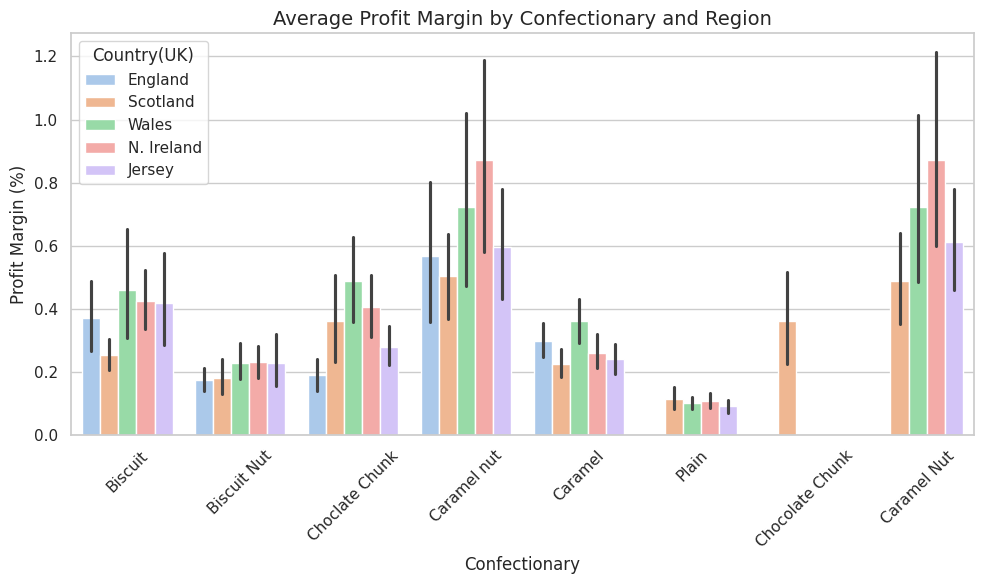

In [38]:

# STEP 3 – Data Analysis and Static Visualisations

sns.set(style="whitegrid", palette="pastel")

#  Confectionary and Region
plt.figure(figsize=(10,6))
sns.barplot(data=data, x='Confectionary', y='Profit Margin (%)', hue='Country(UK)')
plt.title("Average Profit Margin by Confectionary and Region", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("profit_margin_by_confectionary.png", dpi=300)
plt.show()






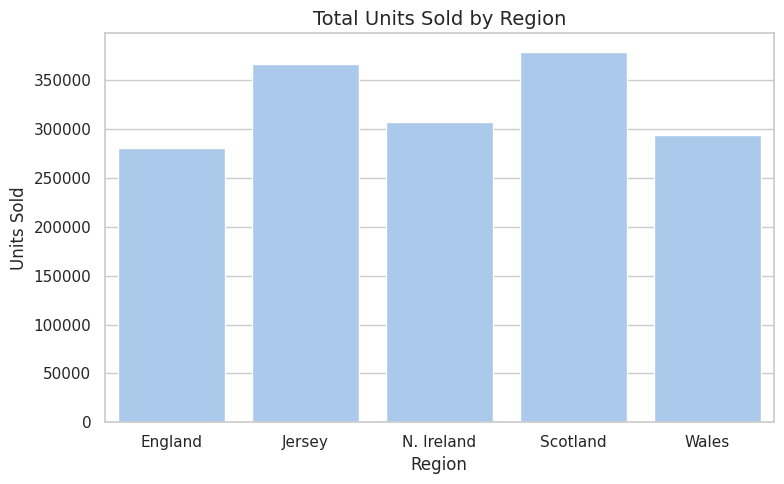

In [39]:
#  Total Sales by Region
region_sales = data.groupby('Country(UK)')['Units Sold'].sum().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x='Country(UK)', y='Units Sold', data=region_sales)
plt.title("Total Units Sold by Region", fontsize=14)
plt.ylabel("Units Sold")
plt.xlabel("Region")
plt.tight_layout()
plt.savefig("total_units_sold_by_region.png", dpi=300)
plt.show()



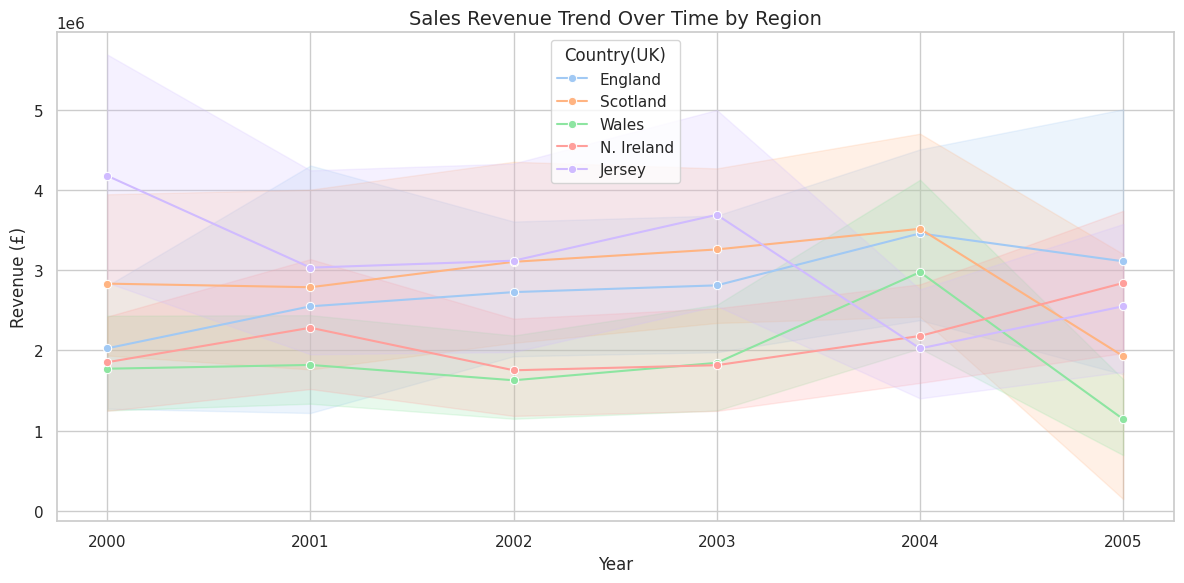

In [40]:
# 3C. Sales Revenue Trend Over Time by Region
plt.figure(figsize=(12,6))
sns.lineplot(x='Year', y='Revenue(£)', hue='Country(UK)', data=data, marker="o")
plt.title("Sales Revenue Trend Over Time by Region", fontsize=14)
plt.ylabel("Revenue (£)")
plt.xlabel("Year")
plt.tight_layout()
plt.savefig("sales_trend_over_time.png", dpi=300)
plt.show()



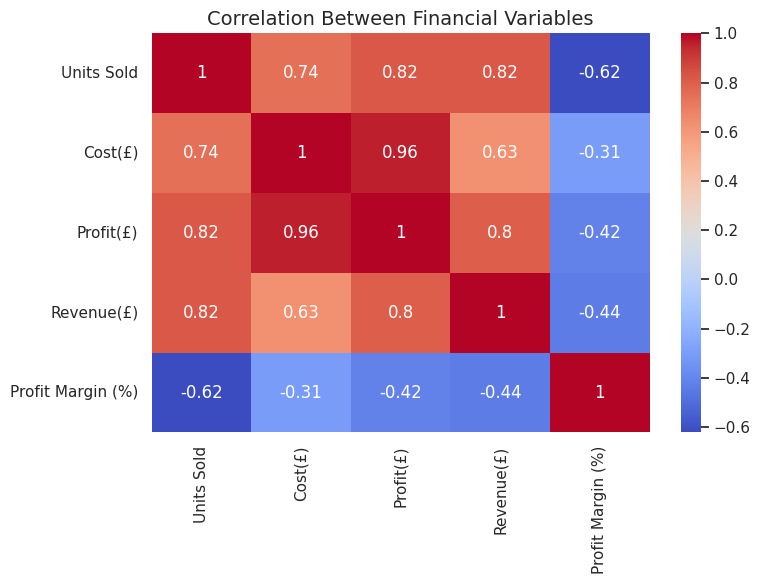

In [41]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data[['Units Sold', 'Cost(£)', 'Profit(£)', 'Revenue(£)', 'Profit Margin (%)']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Financial Variables", fontsize=14)
plt.tight_layout()
plt.savefig("correlation_heatmap.png", dpi=300)
plt.show()

In [42]:
#  Interactive Visualisations



data[numeric_cols + ['Profit Margin (%)']] = data[numeric_cols + ['Profit Margin (%)']].fillna(0)


fig1 = px.bar(
    data,
    x="Confectionary",
    y="Profit Margin (%)",
    color="Country(UK)",
    hover_data=["Revenue(£)", "Profit(£)"],
    title="Interactive: Profit Margin by Confectionary and Region"
)
fig1.show()





In [43]:
#  Line Chart – Revenue Trend Over Time
fig2 = px.line(
    data,
    x="Date",
    y="Revenue(£)",
    color="Country(UK)",
    title="Interactive: Revenue Trend Over Time by Region"
)
fig2.show()




In [44]:
#  Interactive  – Profit vs Revenue

fig3 = px.scatter(
    data,
    x="Revenue(£)",
    y="Profit(£)",
    color="Country(UK)",
    size="Units Sold",
    hover_name="Confectionary",
    title="Interactive: Profit vs Revenue by Region"
)
fig3.show()

In [45]:
#  Insights and Key Findings

summary = data.groupby(['Country(UK)', 'Confectionary']).agg({
    'Revenue(£)': 'sum',
    'Profit(£)': 'sum',
    'Profit Margin (%)': 'mean',
    'Units Sold': 'sum'
}).reset_index()

best_perf = summary.loc[summary.groupby('Country(UK)')['Profit Margin (%)'].idxmax()]
worst_perf = summary.loc[summary.groupby('Country(UK)')['Profit Margin (%)'].idxmin()]

print("\n---- Highest Profit Margin by Region ----")
print(best_perf)

print("\n---- Lowest Profit Margin by Region ----")
print(worst_perf)

peak_sales_region = data.groupby('Country(UK)')['Revenue(£)'].sum().idxmax()
print(f"\nRegion with highest overall sales revenue: {peak_sales_region}")






---- Highest Profit Margin by Region ----
   Country(UK) Confectionary  Revenue(£)  Profit(£)  Profit Margin (%)  \
3      England   Caramel nut  36355242.5   81890.25           0.567582   
8       Jersey   Caramel Nut  25804303.5   83313.75           0.610788   
15  N. Ireland   Caramel Nut  16981284.5   65802.75           0.872771   
23    Scotland   Caramel nut  33332334.5   92251.25           0.503513   
30       Wales   Caramel Nut  21282971.5   76345.75           0.721691   

    Units Sold  
3      25197.0  
8      25635.0  
15     20247.0  
23     28385.0  
30     23491.0  

---- Lowest Profit Margin by Region ----
   Country(UK) Confectionary  Revenue(£)  Profit(£)  Profit Margin (%)  \
1      England   Biscuit Nut  49636890.5    61927.5           0.172358   
11      Jersey         Plain  63509766.0    37843.2           0.089950   
18  N. Ireland         Plain  59354299.2    39731.2           0.107402   
26    Scotland         Plain  55347806.4    39612.8           0.112072  

In [46]:

# STEP 6 – Save Cleaned Data

data.to_excel("Cleaned_Confectionary_Data.xlsx", index=False)
print("\nCleaned dataset saved as 'Cleaned_Confectionary_Data.xlsx'")


Cleaned dataset saved as 'Cleaned_Confectionary_Data.xlsx'
